In [151]:
import nasdaqdatalink as ndl
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
# from config import apiKey

In [134]:
# import requests
# import json

In [135]:
# url=f"https://data.nasdaq.com/api/v3/datasets/OPEC/ORB.csv?api_key={apiKey}"

# response = requests.get(url).json()
# print(json.dumps(respons, indent=4, sort_keys=true))

In [136]:
def linreg(x_axis, y_axis, xlabel, ylabel, title, xpos, ypos):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    print("The r-value is " + str(rvalue) + ".")
    regress_values = slope * x_axis + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_axis, y_axis)
    plt.plot(x_axis, regress_values, "r-")
    plt.annotate(line_eq,(xpos, ypos),fontsize=15,color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    return str(rvalue)

In [137]:
att_data = pd.read_csv("T.csv")
att_data.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,1984-07-19,59.75,59.87,59.38,59.38,77900.0,0.0,1.0,1.275248,1.277809,1.267351,1.267351,934800.0
1,1984-07-20,59.62,60.00,59.25,59.50,129800.0,0.0,1.0,1.272474,1.280584,1.264577,1.269913,1557600.0
2,1984-07-23,59.25,59.75,58.75,59.50,276100.0,0.0,1.0,1.264577,1.275248,1.253905,1.269913,3313200.0
3,1984-07-24,59.75,60.38,59.62,60.00,129100.0,0.0,1.0,1.275248,1.288694,1.272474,1.280584,1549200.0
4,1984-07-25,60.00,61.37,59.87,60.75,152400.0,0.0,1.0,1.280584,1.309824,1.277809,1.296591,1828800.0


In [138]:
att_data['Daily Change'] = att_data['Close'] - att_data['Open']
att_data['Percent Daily Change'] = att_data['Daily Change'] / att_data['Open'] * 100
att_data.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,Daily Change,Percent Daily Change
0,1984-07-19,59.75,59.87,59.38,59.38,77900.0,0.0,1.0,1.275248,1.277809,1.267351,1.267351,934800.0,-0.37,-0.619247
1,1984-07-20,59.62,60.00,59.25,59.50,129800.0,0.0,1.0,1.272474,1.280584,1.264577,1.269913,1557600.0,-0.12,-0.201275
2,1984-07-23,59.25,59.75,58.75,59.50,276100.0,0.0,1.0,1.264577,1.275248,1.253905,1.269913,3313200.0,0.25,0.421941
3,1984-07-24,59.75,60.38,59.62,60.00,129100.0,0.0,1.0,1.275248,1.288694,1.272474,1.280584,1549200.0,0.25,0.418410
4,1984-07-25,60.00,61.37,59.87,60.75,152400.0,0.0,1.0,1.280584,1.309824,1.277809,1.296591,1828800.0,0.75,1.250000


In [139]:
# splits a column of dates in the format YYYY-MM-DD into three columns in the formats YYYY, MM, and DD
def splitDates(df):
    # splitting the values in the Date column
    dates = df['Date'].str.split("-")
    df['Date'] = dates
    
    # Iterating through the dates, putting years, months, and days in their respective lists
    yearList = []
    monthList = []
    dayList = []
    for date in dates:
        yearList.append(int(date[0]))
        monthList.append(int(date[1]))
        dayList.append(int(date[2]))
    # Converting the lists to Series
    years = pd.Series(yearList)
    months = pd.Series(monthList)
    days = pd.Series(dayList)
    # Dropping the old Date column
    df = df.drop(columns="Date")
    # Adding the new columns
    df['Year'] = years
    df['Month'] = months
    df['Day'] = days
    
    # moving the date back to the front of the dataframe
    cols = df.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    cols = cols[-1:] + cols[:-1]
    cols = cols[-1:] + cols[:-1]
    df = df[cols]
    return df

In [140]:
att_data = splitDates(att_data)
att_data

,Year,Month,Day,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,Daily Change,Percent Daily Change
0,1984,7,19,59.75,59.8700,59.38,59.38,77900.0,0.0,1.0,1.275248,1.277809,1.267351,1.267351,934800.0,-0.37,-0.619247
1,1984,7,20,59.62,60.0000,59.25,59.50,129800.0,0.0,1.0,1.272474,1.280584,1.264577,1.269913,1557600.0,-0.12,-0.201275
2,1984,7,23,59.25,59.7500,58.75,59.50,276100.0,0.0,1.0,1.264577,1.275248,1.253905,1.269913,3313200.0,0.25,0.421941
3,1984,7,24,59.75,60.3800,59.62,60.00,129100.0,0.0,1.0,1.275248,1.288694,1.272474,1.280584,1549200.0,0.25,0.418410
4,1984,7,25,60.00,61.3700,59.87,60.75,152400.0,0.0,1.0,1.280584,1.309824,1.277809,1.296591,1828800.0,0.75,1.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8487,2018,3,21,36.34,36.5000,36.00,36.00,16776049.0,0.0,1.0,36.340000,36.500000,36.000000,36.000000,16776049.0,-0.34,-0.935608
8488,2018,3,22,35.95,36.0400,35.36,35.37,28063362.0,0.0,1.0,35.950000,36.040000,35.360000,35.370000,28063362.0,-0.58,-1.613352
8489,2018,3,23,35.37,35.9900,34.55,34.70,34260415.0,0.0,1.0,35.370000,35.990000,34.550000,34.700000,34260415.0,-0.67,-1.894261
8490,2018,3,26,35.06,35.2866,34.44,34.69,31281785.0,0.0,1.0,35.060000,35.286600,34.440000,34.690000,31281785.0,-0.37,-1.055334


In [144]:
df_2001 = att_data[att_data['Year'] == 2001]
df_2001

,Year,Month,Day,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,Daily Change,Percent Daily Change
4158,2001,1,2,47.56,50.44,47.50,50.38,8130400.0,0.00000,1.0,20.437723,21.675331,20.411939,21.649547,8130400.0,2.82,5.929352
4159,2001,1,3,50.38,53.06,50.19,51.00,11303200.0,0.00000,1.0,21.649547,22.801211,21.567900,21.915977,11303200.0,0.62,1.230647
4160,2001,1,4,51.13,52.75,50.94,51.75,9831400.0,0.00000,1.0,21.971841,22.667996,21.890193,22.238271,9831400.0,0.62,1.212595
4161,2001,1,5,51.75,52.06,49.44,50.00,7291400.0,0.00000,1.0,22.238271,22.371486,21.245606,21.486252,7291400.0,-1.75,-3.381643
4162,2001,1,8,49.94,50.69,48.81,50.13,6300700.0,0.25375,1.0,21.569098,21.893023,21.081051,21.651159,6300700.0,0.19,0.380457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4401,2001,12,24,39.00,39.28,38.80,39.10,2859600.0,0.00000,1.0,17.149817,17.272944,17.061870,17.193791,2859600.0,0.10,0.256410
4402,2001,12,26,39.08,39.63,39.08,39.12,3860400.0,0.00000,1.0,17.184997,17.426853,17.184997,17.202586,3860400.0,0.04,0.102354
4403,2001,12,27,39.20,39.70,39.01,39.69,4609000.0,0.00000,1.0,17.237765,17.457635,17.154215,17.453237,4609000.0,0.49,1.250000
4404,2001,12,28,39.92,40.06,39.20,39.49,3944100.0,0.00000,1.0,17.554377,17.615941,17.237765,17.365289,3944100.0,-0.43,-1.077154


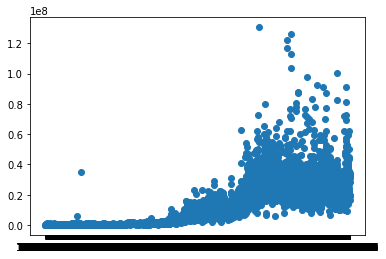

In [14]:
plt.scatter(att_data["Date"], att_data['Volume'])
plt.show()

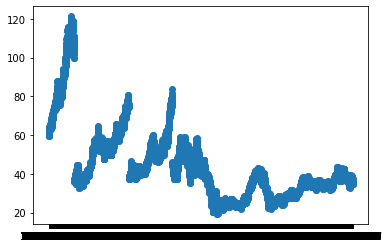

In [30]:
plt.scatter(att_data["Date"], att_data['Close'])
plt.show()

In [8]:
tmobile_data = pd.read_csv("TMUS.csv")
tmobile_data.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,2007-04-19,25.10,27.61,24.50,27.40,31724800.0,0.0,1.0,33.684159,37.052575,32.878960,36.770755,15862400.0
1,2007-04-20,27.40,28.80,27.10,28.55,6109400.0,0.0,1.0,36.770755,38.649553,36.368156,38.314054,3054700.0
2,2007-04-23,28.60,28.94,28.29,28.75,3752800.0,0.0,1.0,38.381154,38.837433,37.965134,38.582453,1876400.0
3,2007-04-24,28.51,29.40,28.51,29.20,3065800.0,0.0,1.0,38.260374,39.454752,38.260374,39.186353,1532900.0
4,2007-04-25,29.55,29.75,28.51,28.61,2450600.0,0.0,1.0,39.656052,39.924452,38.260374,38.394574,1225300.0


In [14]:
tmobile_data['Daily Change'] = tmobile_data['Close'] - tmobile_data['Open']
tmobile_data['Percent Daily Change'] = tmobile_data['Daily Change'] / tmobile_data['Open'] * 100
tmobile_data.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,Yearly Change,Daily Change,Percent Daily Change
0,2007-04-19,25.10,27.61,24.50,27.40,31724800.0,0.0,1.0,33.684159,37.052575,32.878960,36.770755,15862400.0,-2.30,2.30,9.163347
1,2007-04-20,27.40,28.80,27.10,28.55,6109400.0,0.0,1.0,36.770755,38.649553,36.368156,38.314054,3054700.0,-1.15,1.15,4.197080
2,2007-04-23,28.60,28.94,28.29,28.75,3752800.0,0.0,1.0,38.381154,38.837433,37.965134,38.582453,1876400.0,-0.15,0.15,0.524476
3,2007-04-24,28.51,29.40,28.51,29.20,3065800.0,0.0,1.0,38.260374,39.454752,38.260374,39.186353,1532900.0,-0.69,0.69,2.420203
4,2007-04-25,29.55,29.75,28.51,28.61,2450600.0,0.0,1.0,39.656052,39.924452,38.260374,38.394574,1225300.0,0.94,-0.94,-3.181049


In [ ]:
plt.scatter(tmobile_data["Date"], tmobile_data["Volume"])
plt.show()

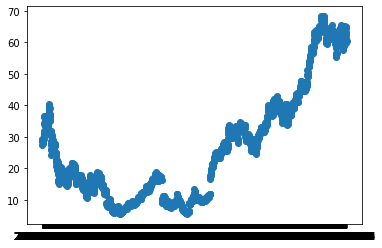

In [34]:
plt.scatter(tmobile_data["Date"], tmobile_data["Close"])
plt.show()

In [4]:
verizon_data = pd.read_csv("VZ.csv")
verizon_data.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,1983-11-21,70.62,70.75,65.62,70.25,627575.0,0.0,1.0,1.649837,1.652874,1.533026,1.641193,5020600.0
1,1983-11-22,70.25,71.25,69.87,70.00,333338.0,0.0,1.0,1.641193,1.664556,1.632316,1.635353,2666704.0
2,1983-11-23,70.00,70.25,69.25,69.62,143988.0,0.0,1.0,1.635353,1.641193,1.617831,1.626475,1151904.0
3,1983-11-25,69.62,69.75,68.87,68.87,221475.0,0.0,1.0,1.626475,1.629512,1.608954,1.608954,1771800.0
4,1983-11-28,68.50,68.50,66.75,67.00,295975.0,0.0,1.0,1.600310,1.600310,1.559426,1.565266,2367800.0


In [17]:
verizon_data['Daily Change'] = verizon_data['Close'] - verizon_data['Open']
verizon_data['Percent Daily Change'] = verizon_data['Daily Change'] / verizon_data['Open'] * 100
verizon_data.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,Daily Change,Percent Daily Change
0,1983-11-21,70.62,70.75,65.62,70.25,627575.0,0.0,1.0,1.649837,1.652874,1.533026,1.641193,5020600.0,-0.37,-0.523931
1,1983-11-22,70.25,71.25,69.87,70.00,333338.0,0.0,1.0,1.641193,1.664556,1.632316,1.635353,2666704.0,-0.25,-0.355872
2,1983-11-23,70.00,70.25,69.25,69.62,143988.0,0.0,1.0,1.635353,1.641193,1.617831,1.626475,1151904.0,-0.38,-0.542857
3,1983-11-25,69.62,69.75,68.87,68.87,221475.0,0.0,1.0,1.626475,1.629512,1.608954,1.608954,1771800.0,-0.75,-1.077277
4,1983-11-28,68.50,68.50,66.75,67.00,295975.0,0.0,1.0,1.600310,1.600310,1.559426,1.565266,2367800.0,-1.50,-2.189781


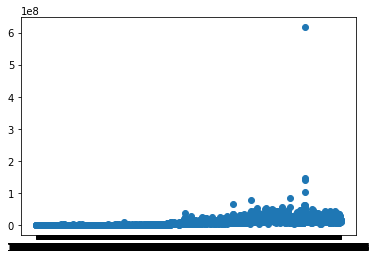

In [33]:
plt.scatter(verizon_data["Date"], verizon_data["Volume"])
plt.show()

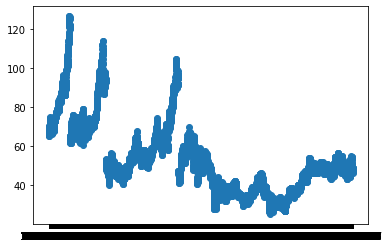

In [6]:
plt.scatter(verizon_data["Date"], verizon_data["Close"])
plt.show()

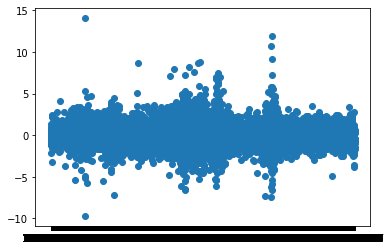

In [18]:
plt.scatter(verizon_data['Date'], verizon_data['Percent Daily Change'])
plt.show()

# The Great Recession

In [6]:
great_recession_t = ndl.get('WIKI/T', start_date="2007-01-01", end_date="2013-01-01")
great_recession_t = great_recession_t.reset_index()
great_recession_tm = ndl.get('WIKI/TMUS', start_date="2007-01-01", end_date="2013-01-01")
great_recession_tm = great_recession_tm.reset_index()
great_recession_vz = ndl.get('WIKI/VZ', start_date="2007-01-01", end_date="2013-01-01")
great_recession_vz = great_recession_vz.reset_index()

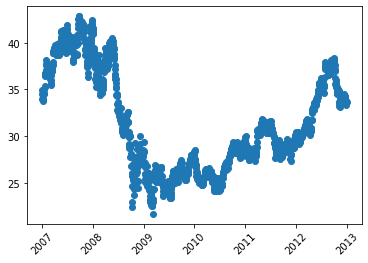

In [4]:
plt.scatter(great_recession_t["Date"], great_recession_t['Close'])
plt.xticks(rotation=45)
plt.show()

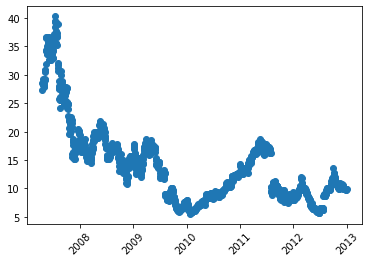

In [5]:
plt.scatter(great_recession_tm["Date"], great_recession_tm['Close'])
plt.xticks(rotation=45)
plt.show()

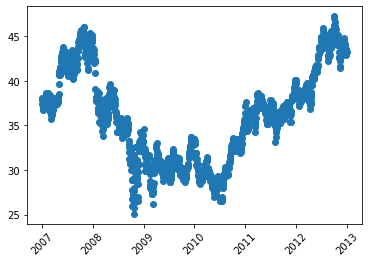

In [7]:
plt.scatter(great_recession_vz["Date"], great_recession_vz['Close'])
plt.xticks(rotation=45)
plt.show()

# 9/11

In [176]:
t_2001 = ndl.get("WIKI/T", start_date="2001-01-01", end_date="2001-12-31").reset_index()
tm_2001 = ndl.get("WIKI/TMUS", start_date="2001-01-03", end_date="2001-12-30")
vz_2001 = ndl.get("WIKI/VZ", start_date="2001-01-01", end_date="2001-12-31").reset_index()

In [177]:
tm_2001

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,


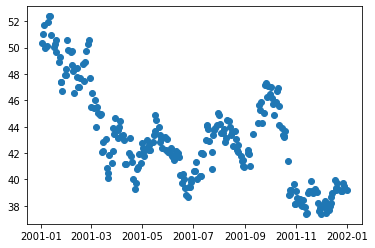

In [162]:
plt.scatter(t_2001['Date'], t_2001['Close'])
plt.show()

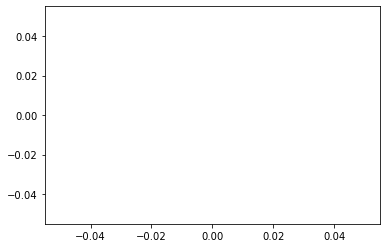

In [163]:
plt.scatter(tm_2001['Date'], tm_2001['Close'])
plt.show()

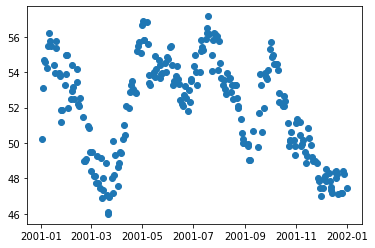

In [164]:
plt.scatter(vz_2001['Date'], vz_2001['Close'])
plt.show()